<a href="https://colab.research.google.com/github/ArifAygun/Advanced-Pandas/blob/main/Iron_Ore_Froth_Flotation_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Quality Prediction of Iron Ore Mining Flotation Process**

####**What is Froth Flotation Process**

Froth flotation is an important concentration process. This process can be used to separate any two different particles and operated by the surface chemistry of the particles. In flotation, bubbles are introduced into a pulp and the bubbles rise through the pulp. In the process, hydrophobic particles become bound to the surface of the bubbles. The driving force for this attachment is the change in the surface free energy when the attachment occurs. These bubbles rise through the slurry and are collected from the surface. To enable these particles to attach, careful consideration of the chemistry of the pulp needs to be made.

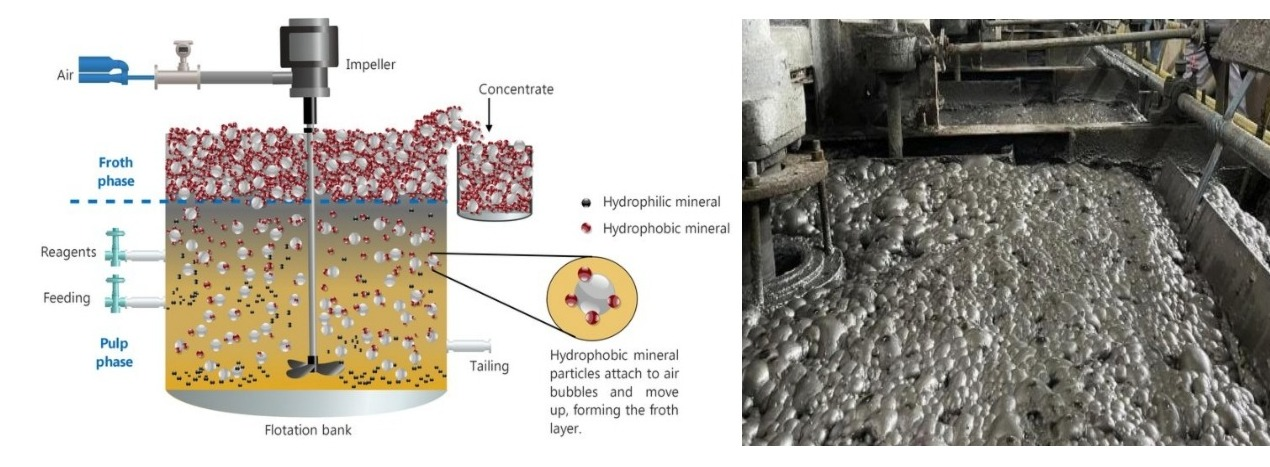

**Data Definitions**:

- **Date**: Data collection time.
- **% Iron Feed**: Feed grade of iron-containing ore.
- **% Silica Feed**: Feed grade of silica-containing ore.
- **Starch Flow**: Depressant chemical for Iron(Fe) containing ore measured in m³/h.
- **Amina Flow**: Collector chemical for Silica containing ore measured in m³/h.
- **Ore Pulp Flow**: The amount of pulp flow fed to the flotation columns as the product of the previous process step measured in t/h.
- **Ore Pulp pH**: pH is measured in pH scale.
- **Ore Pulp Density**: The solid percent of ore fed density ranges in kg/cm³
- **Flotation Column 01, 02, 03, 04, 05, 06, 07 Air Flow**: Air Flows that goes into the flotation cell measured in Nm³/h.
- **Flotation Column 01, 02, 03, 04, 05, 06, 07 Level**: Froth level in the flotation cell measured in mm.
- **% Iron Concentrate**: Concentrate grade of iron-containing ore in percentage.
- **% Silica Concentrate**: Concentrate grade of silica-containing ore in percentage

####**What are we looking for?**

- Can we accurately predict Silica Concentrate, so we can have a chance to act on it before lab tests come back?
- What are the most important variables and how do they influence the level of Silica Concentrate?
- What values should we choose for controllable variables?
- Is it possible to predict % Silica Concentrate every minute?
- Is it possible to predict % Silica in Concentrate whitout using % Iron Concentrate column?

####**Import Libraries and Modules**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import joblib

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

####**Import Dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/Flotation/

raw_data = pd.read_csv('Flotation_Plant.csv', sep= ',', decimal = ',')
raw_data.head()

Mounted at /content/drive/
/content/drive/My Drive/Flotation


,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [5]:
sorted = raw_data.sort_values(by ='Ore Pulp Density')
sorted

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
374964,2017-06-18 02:00:00,55.97,12.31,1236.855548,413.164,399.939,9.29719,1.519820,301.069,298.605,...,292.736,402.678,407.894000,410.733,404.185,452.713000,603.703,588.755,64.82,1.18
374963,2017-06-18 02:00:00,55.97,12.31,1190.208194,411.540,400.162,9.29837,1.519823,300.704,304.554,...,312.206,391.876,418.333000,407.512,404.939,452.138000,602.662,583.721,64.82,1.18
374962,2017-06-18 02:00:00,55.97,12.31,1143.560839,412.150,401.841,9.29955,1.519826,301.201,303.485,...,308.200,389.442,439.189000,411.250,424.731,439.155000,602.812,584.602,64.82,1.18
374961,2017-06-18 02:00:00,55.97,12.31,1096.913484,411.949,394.468,9.30072,1.519829,301.510,302.211,...,287.986,396.294,431.801000,404.267,443.107,441.030000,597.959,592.803,64.82,1.18
56369,2017-04-05 08:00:00,57.01,12.91,1295.200000,350.799,402.989,9.08415,1.519830,250.488,247.539,...,250.191,801.282,791.901000,804.617,377.250,404.060000,597.174,410.240,65.69,1.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597802,2017-08-08 16:00:00,48.81,25.31,3091.240000,526.903,390.679,10.30540,1.853207,301.762,300.261,...,251.005,387.014,255.375839,522.559,387.344,246.139000,429.420,265.018,65.97,1.02
597803,2017-08-08 16:00:00,48.81,25.31,3089.840000,525.261,382.514,10.30580,1.853218,301.685,299.061,...,249.932,435.131,255.647041,480.168,324.425,197.277000,430.883,262.864,65.97,1.02
597804,2017-08-08 16:00:00,48.81,25.31,3089.840000,520.609,384.283,10.30630,1.853229,300.550,300.105,...,249.531,469.882,255.918244,469.287,304.978,197.666757,441.635,254.002,65.97,1.02
597805,2017-08-08 16:00:00,48.81,25.31,3088.240000,526.619,387.364,10.30680,1.853239,299.644,302.080,...,249.468,484.948,256.189446,479.102,330.792,198.056514,422.721,232.459,65.97,1.02


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          737453 non-null  object 
 1   % Iron Feed                   737453 non-null  float64
 2   % Silica Feed                 737453 non-null  float64
 3   Starch Flow                   737453 non-null  float64
 4   Amina Flow                    737453 non-null  float64
 5   Ore Pulp Flow                 737453 non-null  float64
 6   Ore Pulp pH                   737453 non-null  float64
 7   Ore Pulp Density              737453 non-null  float64
 8   Flotation Column 01 Air Flow  737453 non-null  float64
 9   Flotation Column 02 Air Flow  737453 non-null  float64
 10  Flotation Column 03 Air Flow  737453 non-null  float64
 11  Flotation Column 04 Air Flow  737453 non-null  float64
 12  Flotation Column 05 Air Flow  737453 non-nul

In [4]:
raw_data.shape

(737453, 24)

In [5]:
df_datatype = pd.concat([raw_data.dtypes, raw_data.nunique(),
                         round(raw_data.nunique()*100/len(raw_data), 2),
                         raw_data.isnull().sum(),
                         round(raw_data.isnull().sum()*100/len(raw_data),2)],
                        axis=1)

df_datatype.columns = ['data type',
                       'No. of categories',
                       'No. of categories %',
                       'missing values',
                       'missing values %']

df_datatype.sort_values(by='missing values %',
                        ascending=False, inplace=True)
df_datatype

,data type,No. of categories,No. of categories %,missing values,missing values %
date,object,4097,0.56,0,0.0
% Iron Feed,float64,278,0.04,0,0.0
% Iron Concentrate,float64,38696,5.25,0,0.0
Flotation Column 07 Level,float64,295667,40.09,0,0.0
Flotation Column 06 Level,float64,301502,40.88,0,0.0
Flotation Column 05 Level,float64,276051,37.43,0,0.0
Flotation Column 04 Level,float64,309264,41.94,0,0.0
Flotation Column 03 Level,float64,322315,43.71,0,0.0
Flotation Column 02 Level,float64,331189,44.91,0,0.0
Flotation Column 01 Level,float64,299573,40.62,0,0.0


- looks like we do not have missing values across the dataframe

In [6]:
#checking if there are any duplicate rows
duplicate_rows = raw_data[raw_data.duplicated()]
duplicate_rows.shape

(1171, 24)

In [7]:
#dropping date column since it is not important while predicting the % Silica Concentrate
cols_to_drop = ('date')
df = raw_data.drop(columns = cols_to_drop)
df.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [8]:
df.dtypes

% Iron Feed                     float64
% Silica Feed                   float64
Starch Flow                     float64
Amina Flow                      float64
Ore Pulp Flow                   float64
Ore Pulp pH                     float64
Ore Pulp Density                float64
Flotation Column 01 Air Flow    float64
Flotation Column 02 Air Flow    float64
Flotation Column 03 Air Flow    float64
Flotation Column 04 Air Flow    float64
Flotation Column 05 Air Flow    float64
Flotation Column 06 Air Flow    float64
Flotation Column 07 Air Flow    float64
Flotation Column 01 Level       float64
Flotation Column 02 Level       float64
Flotation Column 03 Level       float64
Flotation Column 04 Level       float64
Flotation Column 05 Level       float64
Flotation Column 06 Level       float64
Flotation Column 07 Level       float64
% Iron Concentrate              float64
% Silica Concentrate            float64
dtype: object

In [9]:
#check duplicated rows
duplicate_rows = df[df.duplicated()]
duplicate_rows.shape

(1171, 23)

In [10]:
df = df.drop_duplicates()
df.shape

(736282, 23)

In [11]:
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,...,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.00000,736282.000000,736282.000000,736282.000000,736282.000000
mean,56.298307,14.648984,2869.636615,488.165523,397.570736,9.767315,1.680424,280.119813,277.121249,281.052538,...,290.740507,520.168402,522.555279,531.283790,420.169753,425.09453,429.889517,420.910258,65.049096,2.327270
std,5.160365,6.810741,1216.017896,91.254428,9.705444,0.387176,0.069206,29.633831,30.157126,28.571077,...,28.690520,131.085819,128.216232,150.931865,91.755819,84.47917,89.919586,84.899167,1.118721,1.125616
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.99100,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2075.070000,431.835848,394.248000,9.527050,1.647390,250.278000,250.448000,250.847000,...,256.047750,416.902000,441.835250,411.256000,356.627000,357.59525,358.438000,356.705250,64.370000,1.440000
50%,56.080000,13.850000,3020.230000,504.352500,399.238000,9.797460,1.697580,299.341000,296.202000,298.690000,...,299.002000,491.749000,495.853500,494.184000,411.770500,408.65000,424.427000,410.940000,65.210000,2.000000
75%,59.720000,19.600000,3728.930000,553.335750,402.967000,10.037800,1.728380,300.147000,300.686000,300.385000,...,301.907000,594.097750,595.293000,601.299000,485.285000,484.00800,492.773000,476.145000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.64400,698.861000,659.902000,68.010000,5.530000


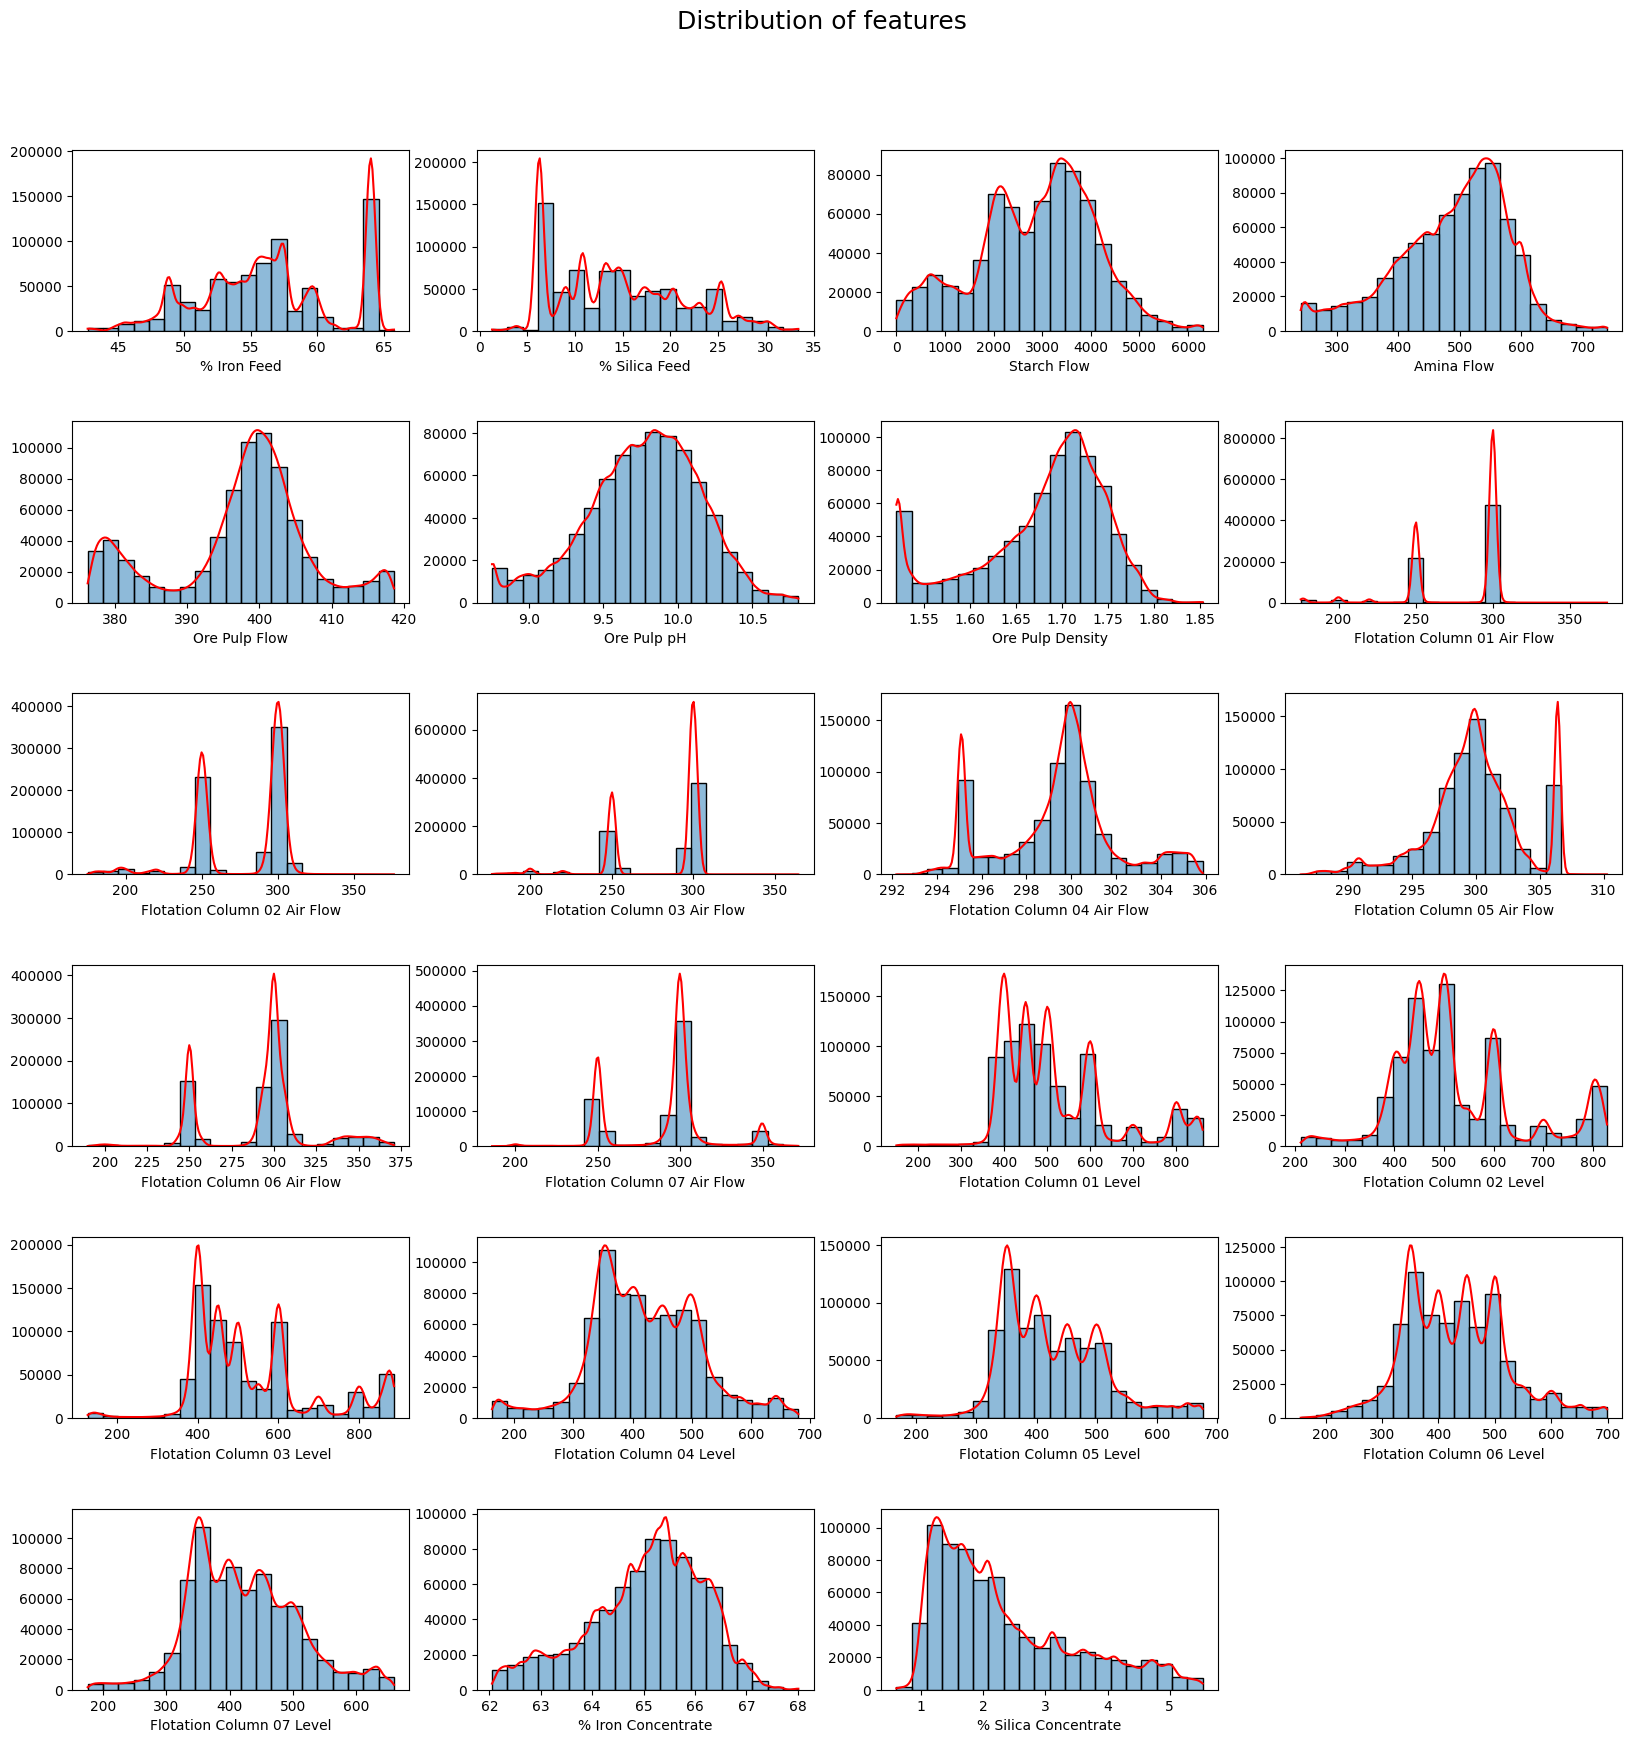

In [12]:
features = df.columns
plt.figure(figsize= (20,20))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Distribution of features", fontsize=18, y=0.95)
for i, feature in enumerate(features):
 k = i + 1
 plt.subplot(6,4,int(k))
 sns.histplot(data = df, x= feature,kde=True, bins = 20).lines[0].set_color('red')
 plt.xlabel(feature)
 plt.ylabel("")
plt.show()

- Distribution of Target Variable

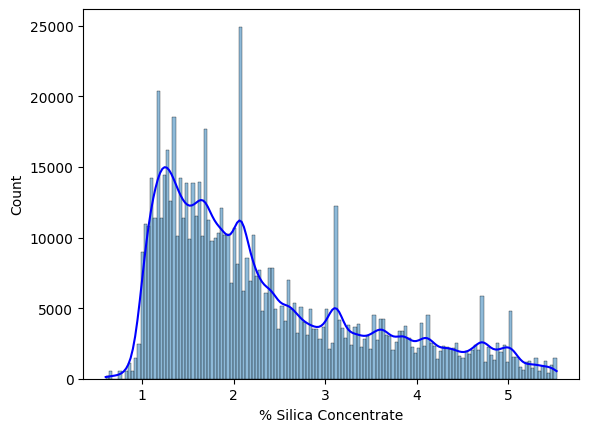

In [13]:
sns.histplot(data = df, x = "% Silica Concentrate", kde = True).lines[0].set_color('blue')

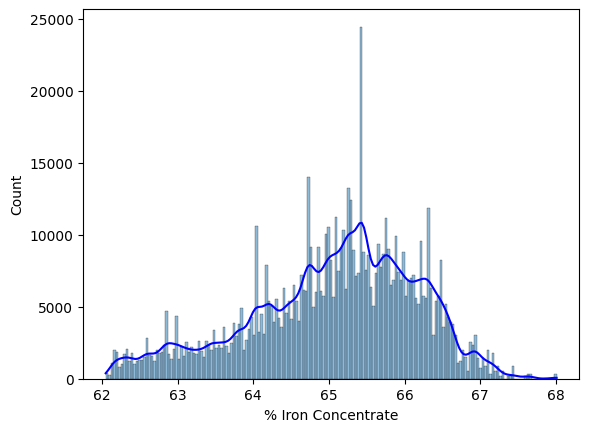

In [14]:
sns.histplot(data = df, x = "% Iron Concentrate", kde = True).lines[0].set_color('blue')

- Box plots of Iron Feed - Silica Feed and Iron Concentrate - Silica Concentrate

Text(0.5, 0, '%')

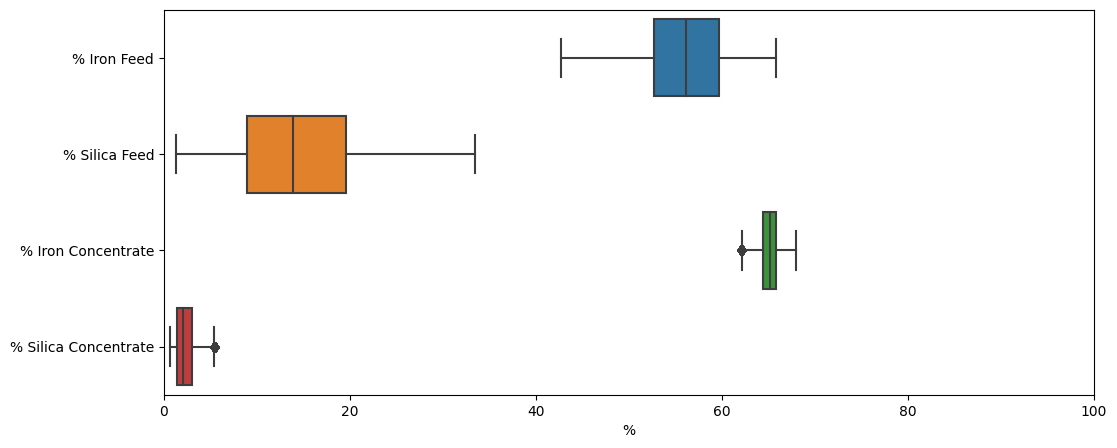

In [15]:
plt.figure(figsize = (12, 5))
sns.boxplot(data = df[['% Iron Feed', '% Silica Feed','% Iron Concentrate','% Silica Concentrate']], orient = 'h').set(xlim = (0, 100))
plt.xlabel('%')

- Box plots of Air Flows

Text(0.5, 0, 'Nm³/h')

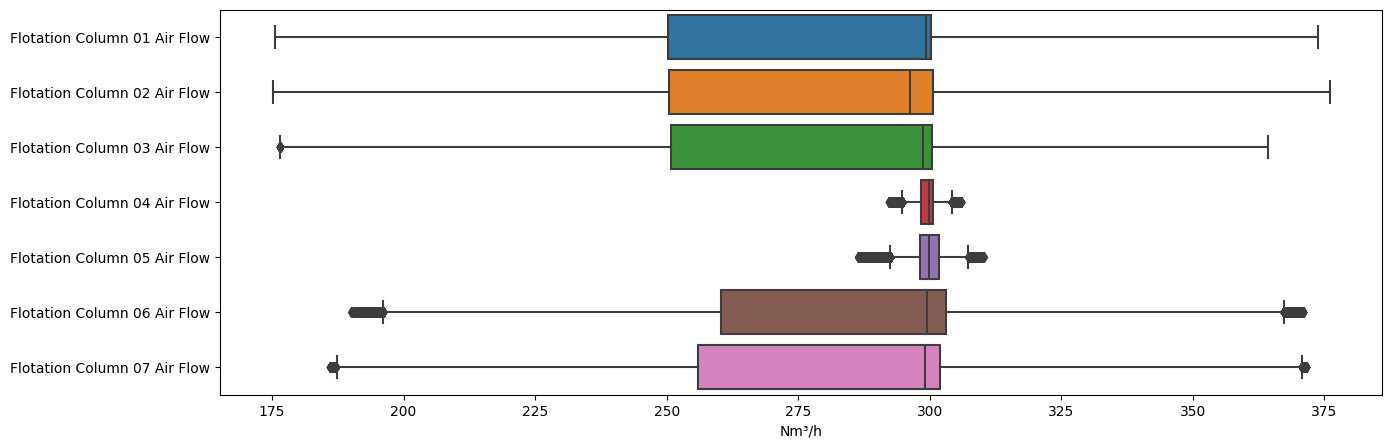

In [16]:
plt.figure(figsize = (15, 5))
sns.boxplot(data = df[['Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow']], orient = 'h')
plt.xlabel('Nm³/h')

- Box plots of Froth Levels

Text(0.5, 0, 'mm')

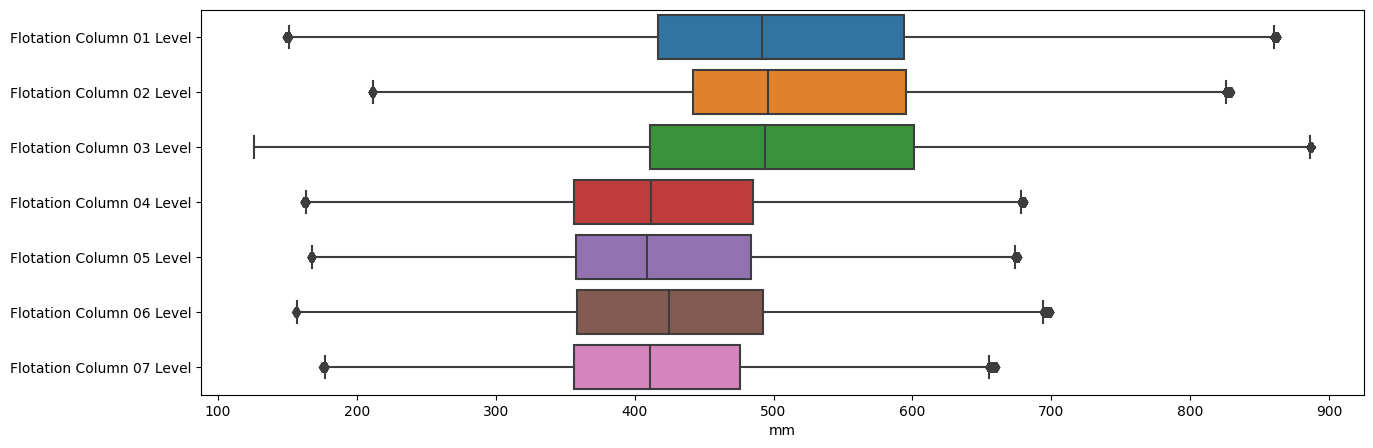

In [17]:
plt.figure(figsize = (15, 5))
sns.boxplot(data = df[['Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level']], orient = 'h')
plt.xlabel('mm')

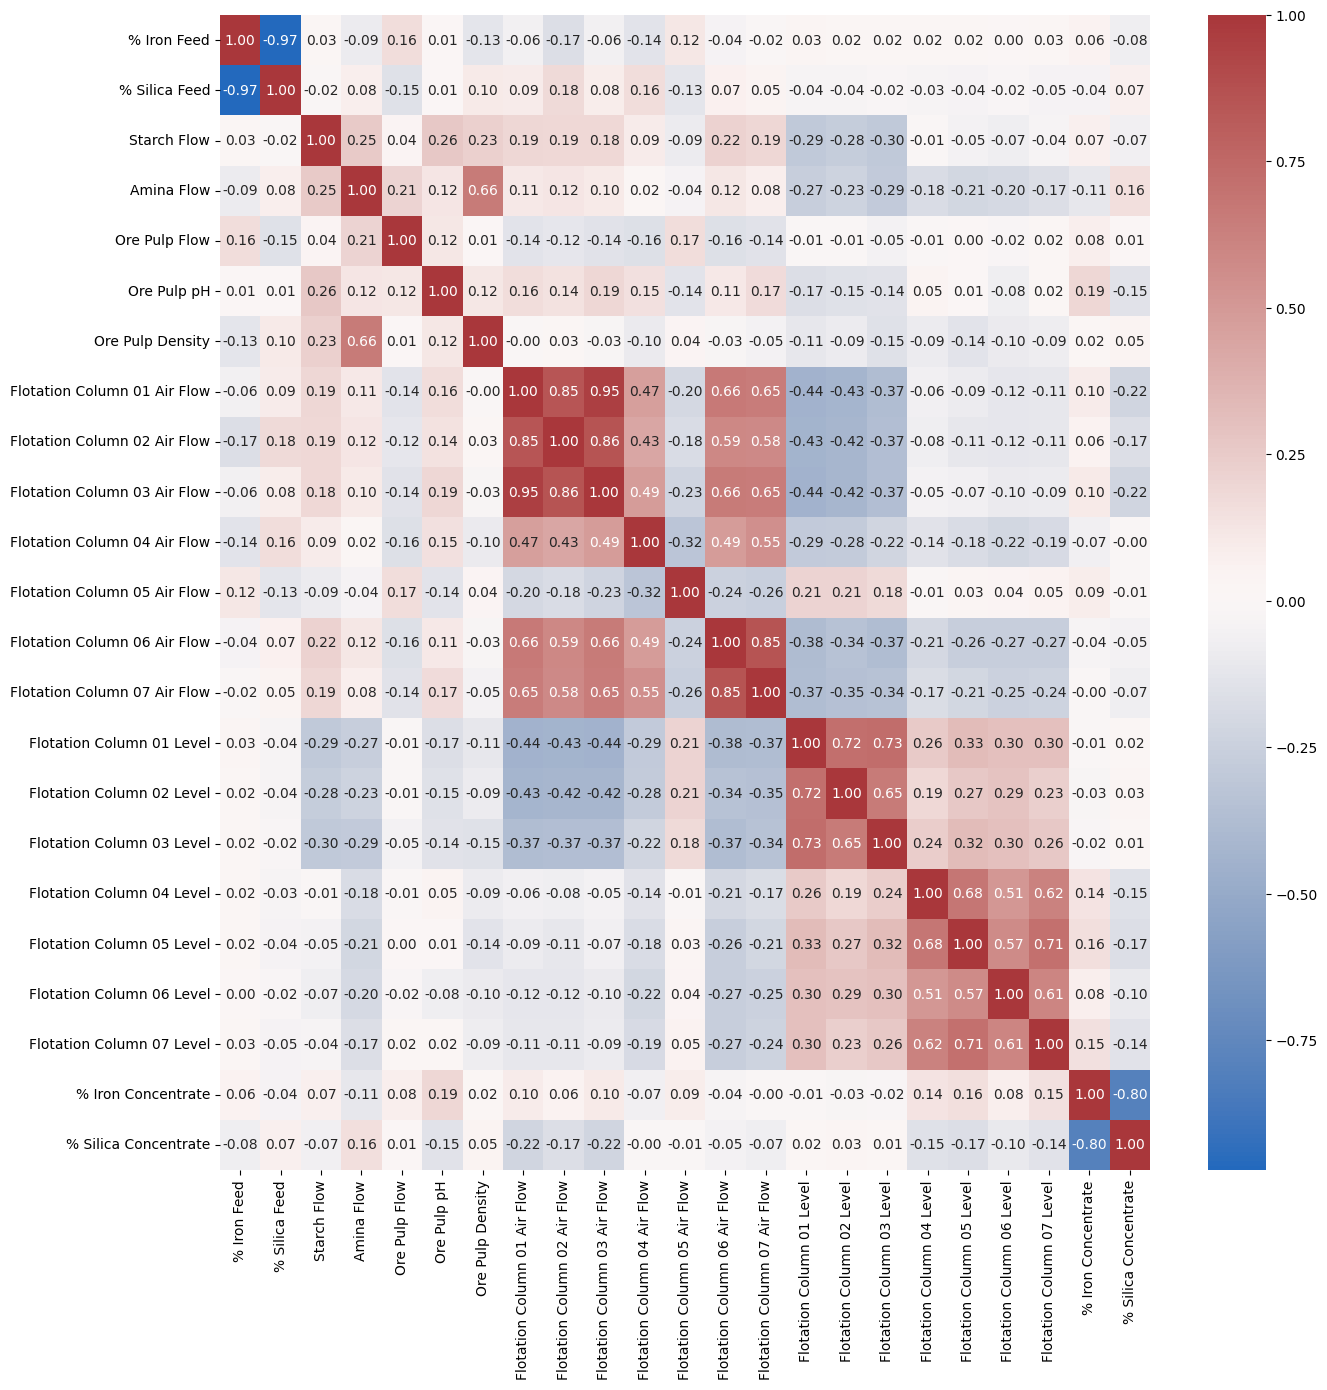

In [18]:
plt.figure(figsize = (15, 15))
_ = sns.heatmap(df.corr(), annot = True, fmt='.2f', cmap= 'vlag')

- The target variable % Silica Concentrate is highly corelated with % Iron Concentrate as expected, therefore I will drop the % Iron Concentrate column for the model.

In [19]:
df = df.drop(columns = ['% Iron Concentrate'])
df.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Silica Concentrate
0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,...,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,1.31
1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,1.31
2,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,...,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,1.31
3,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,...,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,1.31
4,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,...,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,1.31


- splitting the data into training, validation and test set
- training set will be used to train the models
- validation set will be used to choose the mode
- test set will be used to check the performance of the chosen model on new data

In [20]:
X = df.iloc[:, 0:21]
y = df.iloc[:, 21:]

In [21]:
X_train, X_, y_train, y_ = train_test_split(X, y, train_size = 0.6, random_state = 42, shuffle = True)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size = 0.5, random_state = 42)

In [22]:
print(f'The shape of X_train is {X_train.shape}')
print(f'The shape of X_val is {X_val.shape}')
print(f'The shape of X_test is {X_test.shape}')
print(f'The shape of y_train is {y_train.shape}')
print(f'The shape of y_train is {y_train.shape}')
print(f'The shape of y_test is {y_test.shape}')

The shape of X_train is (441769, 21)
The shape of X_val is (147256, 21)
The shape of X_test is (147257, 21)
The shape of y_train is (441769, 1)
The shape of y_train is (441769, 1)
The shape of y_test is (147257, 1)


- Scale/normalize the training data (z-score normalization)
- In the interest of preventing information about the distribution of the test set leaking into the model
- Fit the scaler on the training data only 
- Standardize training, validation and test sets with that scaler.

In [23]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_val = SS.transform(X_val)
X_test = SS.transform(X_test)

- Using a dummy regressor to create a baseline model.
- This regressor is useful as a simple baseline to compare with other (real) regressors.

In [24]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy = 'mean')
dummy.fit(X_train, y_train)

DummyRegressor()

In [25]:
dummy_preds = dummy.predict(X_val)

In [26]:
from sklearn.metrics import mean_squared_error

dummy_rmse = mean_squared_error(y_val, dummy_preds, squared = False) 
dummy_rmse

1.123974305203036

- Build models that perform better than dummy regressor

- Model 1. Linear regression

In [27]:
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression()

In [28]:
LR_preds = LR_model.predict(X_val)

In [29]:
LR_rmse = mean_squared_error(y_val, LR_preds, squared = False)
LR_rmse

1.0349214442597656

- Linear Regression model performs better than dummy regressor
- Check the performance of another models.

- Model 2. Stochastic Gradient Descent

In [30]:
from sklearn.linear_model import SGDRegressor

SGD_model = SGDRegressor()
SGD_model.fit(X_train, y_train)
print(SGD_model)
print(f"number of iterations completed: {SGD_model.n_iter_}, number of weight updates: {SGD_model.t_}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor()
number of iterations completed: 7, number of weight updates: 3092384.0


In [31]:
SGD_preds = SGD_model.predict(X_val)

In [32]:
SGD_rmse = mean_squared_error(y_val, SGD_preds, squared = False)
SGD_rmse

1.036473915191452

In [33]:
result = pd.DataFrame({'Actual': y_val.values.ravel(), 'Predicted': SGD_preds})
print(result)

        Actual  Predicted
0         1.41   2.252748
1         1.30   2.381919
2         1.53   2.584013
3         1.38   2.161203
4         4.13   2.178927
...        ...        ...
147251    1.08   1.882206
147252    1.43   1.484405
147253    2.52   2.563343
147254    1.59   2.373743
147255    1.69   1.652147

[147256 rows x 2 columns]


- Model 3. Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_jobs = -1, verbose = 2)

In [35]:
#RF.fit(X_train, y_train.values.ravel())

In [36]:
#RF_predict = RF.predict(X_val)
#RF_rmse = mean_squared_error(y_val, RF_predict, squared = False)
#RF_rmse

In [37]:
SGD_predict = SGD_model.predict(X_val)
SGD_rmse = mean_squared_error(y_val, SGD_predict, squared=False)


In [38]:
#comparison = pd.DataFrame({'Model': ['Linear Regression', 'SGDRegressor', 'Random Forest'],
#                           'RMSE': [LR_rmse, SGD_rmse, RF_rmse]}, columns = ['Model', 'RMSE'])
#comparison

In [39]:
importance = RF.feature_importances_
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

NotFittedError: ignored

###**Hyperparameter tuning**

**Randomized search**

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 80, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 30, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}
print(random_grid)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator = RF, param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2, random_state=42,
                               n_jobs = -1, scoring='neg_root_mean_squared_error')
# Fit the random search model
#rf_random.fit(X_train, y_train)

In [ ]:
import os
import joblib
#joblib.dump(rf_random, "RF_compressed.joblib", compress=3)  # compression is ON!
#print(f"Compressed Random Forest: {np.round(os.path.getsize('RF_compressed.joblib') / 1024 / 1024, 2) } MB")
loaded_rf = joblib.load("RF_compressed.joblib")

In [ ]:
loaded_rf.best_estimator_

In [ ]:
loaded_rf.best_params_

In [ ]:
random_best= loaded_rf.best_estimator_.predict(X_val)

In [ ]:
rf_preds_best = mean_squared_error(y_val, random_best, squared = False)
rf_preds_best

In [ ]:
#final validation on test set
random_best_testset = loaded_rf.best_estimator_.predict(X_test)
rf_preds_best_testset = mean_squared_error(y_test, random_best_testset, squared = False)
rf_preds_best_testset

###**GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_grid = GridSearchCV(estimator=RF, param_grid=param_grid, cv=3, verbose=2,
                       n_jobs=-1, scoring='neg_root_mean_squared_error')

#rf_grid.fit(X_train, y_train)
